In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt1
%matplotlib inline

In [33]:
sns.set(rc={'figure.figsize':(30,50)})

In [34]:
df = pd.read_csv("compas-scores-raw.csv")

In [35]:
df.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


## Pandas Profiling

In [36]:
import pandas_profiling

In [37]:
pandas_profiling.ProfileReport(df)

C:\Users\kwong\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,28
Number of observations,60843
Total Missing (%),2.7%
Total size in memory,13.0 MiB
Average record size in memory,224.0 B
Numeric,6
Categorical,17
Boolean,1
Date,0
Text (Unique),0
Rejected,4


## There are no duplicates

In [38]:
df.shape

(60843, 28)

In [39]:
df = df.drop_duplicates(keep='first')

In [40]:
df.shape

(60843, 28)

## Correct Types

In [41]:
df.dtypes

Person_ID                    int64
AssessmentID                 int64
Case_ID                      int64
Agency_Text                 object
LastName                    object
FirstName                   object
MiddleName                  object
Sex_Code_Text               object
Ethnic_Code_Text            object
DateOfBirth                 object
ScaleSet_ID                  int64
ScaleSet                    object
AssessmentReason            object
Language                    object
LegalStatus                 object
CustodyStatus               object
MaritalStatus               object
Screening_Date              object
RecSupervisionLevel          int64
RecSupervisionLevelText     object
Scale_ID                     int64
DisplayText                 object
RawScore                   float64
DecileScore                  int64
ScoreText                   object
AssessmentType              object
IsCompleted                  int64
IsDeleted                    int64
dtype: object

In [42]:
df.DateOfBirth = pd.to_datetime(df['DateOfBirth'])
df.Screening_Date = pd.to_datetime(df['Screening_Date'])

In [43]:
df.dtypes

Person_ID                           int64
AssessmentID                        int64
Case_ID                             int64
Agency_Text                        object
LastName                           object
FirstName                          object
MiddleName                         object
Sex_Code_Text                      object
Ethnic_Code_Text                   object
DateOfBirth                datetime64[ns]
ScaleSet_ID                         int64
ScaleSet                           object
AssessmentReason                   object
Language                           object
LegalStatus                        object
CustodyStatus                      object
MaritalStatus                      object
Screening_Date             datetime64[ns]
RecSupervisionLevel                 int64
RecSupervisionLevelText            object
Scale_ID                            int64
DisplayText                        object
RawScore                          float64
DecileScore                       

## Columns

In [44]:
df.columns

Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text',
       'DateOfBirth', 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType', 'IsCompleted', 'IsDeleted'],
      dtype='object')

In [45]:
columns_to_drop = ['AssessmentID','Case_ID','ScaleSet_ID','IsCompleted','IsDeleted']
df = df.drop(columns_to_drop, axis=1)
df.head()

## Rename column names

,Person_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet,AssessmentReason,...,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType
0,50844,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,1992-12-05,Risk and Prescreen,Intake,...,Single,2013-01-01,1,Low,7,Risk of Violence,-2.08,4,Low,New
1,50844,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,1992-12-05,Risk and Prescreen,Intake,...,Single,2013-01-01,1,Low,8,Risk of Recidivism,-1.06,2,Low,New
2,50844,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,1992-12-05,Risk and Prescreen,Intake,...,Single,2013-01-01,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New
3,50848,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,1984-09-16,Risk and Prescreen,Intake,...,Married,2013-01-01,1,Low,7,Risk of Violence,-2.84,2,Low,New
4,50848,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,1984-09-16,Risk and Prescreen,Intake,...,Married,2013-01-01,1,Low,8,Risk of Recidivism,-1.50,1,Low,New


In [46]:
df.rename(columns={'Sex_Code_Text': 'Sex', 'Ethnic_Code_Text': 'Race', 'DisplayText': 'RiskType'}, inplace=True)

In [47]:
df.head()

,Person_ID,Agency_Text,LastName,FirstName,MiddleName,Sex,Race,DateOfBirth,ScaleSet,AssessmentReason,...,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,RiskType,RawScore,DecileScore,ScoreText,AssessmentType
0,50844,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,1992-12-05,Risk and Prescreen,Intake,...,Single,2013-01-01,1,Low,7,Risk of Violence,-2.08,4,Low,New
1,50844,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,1992-12-05,Risk and Prescreen,Intake,...,Single,2013-01-01,1,Low,8,Risk of Recidivism,-1.06,2,Low,New
2,50844,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,1992-12-05,Risk and Prescreen,Intake,...,Single,2013-01-01,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New
3,50848,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,1984-09-16,Risk and Prescreen,Intake,...,Married,2013-01-01,1,Low,7,Risk of Violence,-2.84,2,Low,New
4,50848,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,1984-09-16,Risk and Prescreen,Intake,...,Married,2013-01-01,1,Low,8,Risk of Recidivism,-1.50,1,Low,New


In [48]:
df.columns

Index(['Person_ID', 'Agency_Text', 'LastName', 'FirstName', 'MiddleName',
       'Sex', 'Race', 'DateOfBirth', 'ScaleSet', 'AssessmentReason',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'Scale_ID', 'RiskType', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType'],
      dtype='object')

## Any Nulls?

In [49]:
df.isnull().sum()

Person_ID                      0
Agency_Text                    0
LastName                       0
FirstName                      0
MiddleName                 45195
Sex                            0
Race                           0
DateOfBirth                    0
ScaleSet                       0
AssessmentReason               0
Language                       0
LegalStatus                    0
CustodyStatus                  0
MaritalStatus                  0
Screening_Date                 0
RecSupervisionLevel            0
RecSupervisionLevelText        0
Scale_ID                       0
RiskType                       0
RawScore                       0
DecileScore                    0
ScoreText                     45
AssessmentType                 0
dtype: int64

# Any relation between race and recidivism?

In [50]:
df[df.Race == 'African-Am']

,Person_ID,Agency_Text,LastName,FirstName,MiddleName,Sex,Race,DateOfBirth,ScaleSet,AssessmentReason,...,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,RiskType,RawScore,DecileScore,ScoreText,AssessmentType
1497,4074,PRETRIAL,pratt,michael,NaN,Male,African-Am,1983-03-22,Risk and Prescreen,Intake,...,Single,2013-01-16,4,High,7,Risk of Violence,-0.67,9,High,New
1498,4074,PRETRIAL,pratt,michael,NaN,Male,African-Am,1983-03-22,Risk and Prescreen,Intake,...,Single,2013-01-16,4,High,8,Risk of Recidivism,0.83,10,High,New
1499,4074,PRETRIAL,pratt,michael,NaN,Male,African-Am,1983-03-22,Risk and Prescreen,Intake,...,Single,2013-01-16,4,High,18,Risk of Failure to Appear,24.00,6,Medium,New
1668,51294,Probation,Jean Baptiste,Examon,NaN,Male,African-Am,2055-12-25,Risk and Prescreen,Intake,...,Single,2013-01-17,1,Low,7,Risk of Violence,-4.12,1,Low,New
1669,51294,Probation,Jean Baptiste,Examon,NaN,Male,African-Am,2055-12-25,Risk and Prescreen,Intake,...,Single,2013-01-17,1,Low,8,Risk of Recidivism,-1.58,1,Low,New
1670,51294,Probation,Jean Baptiste,Examon,NaN,Male,African-Am,2055-12-25,Risk and Prescreen,Intake,...,Single,2013-01-17,1,Low,18,Risk of Failure to Appear,14.00,1,Low,New
1968,51387,PRETRIAL,Cooks,James,NaN,Male,African-Am,2067-05-30,Risk and Prescreen,Intake,...,Single,2013-01-20,3,Medium with Override Consideration,7,Risk of Violence,-3.02,1,Low,New
1969,51387,PRETRIAL,Cooks,James,NaN,Male,African-Am,2067-05-30,Risk and Prescreen,Intake,...,Single,2013-01-20,3,Medium with Override Consideration,8,Risk of Recidivism,0.13,8,High,New
1970,51387,PRETRIAL,Cooks,James,NaN,Male,African-Am,2067-05-30,Risk and Prescreen,Intake,...,Single,2013-01-20,3,Medium with Override Consideration,18,Risk of Failure to Appear,25.00,6,Medium,New
2403,51501,PRETRIAL,Jones,Johnny,NaN,Male,African-Am,1983-10-13,Risk and Prescreen,Intake,...,Single,2013-01-24,2,Medium,7,Risk of Violence,-2.20,4,Low,New


In [51]:
df.Race = df.Race.replace({
    'African-Am':'African-American'
})

In [52]:
df.head()

,Person_ID,Agency_Text,LastName,FirstName,MiddleName,Sex,Race,DateOfBirth,ScaleSet,AssessmentReason,...,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,RiskType,RawScore,DecileScore,ScoreText,AssessmentType
0,50844,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,1992-12-05,Risk and Prescreen,Intake,...,Single,2013-01-01,1,Low,7,Risk of Violence,-2.08,4,Low,New
1,50844,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,1992-12-05,Risk and Prescreen,Intake,...,Single,2013-01-01,1,Low,8,Risk of Recidivism,-1.06,2,Low,New
2,50844,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,1992-12-05,Risk and Prescreen,Intake,...,Single,2013-01-01,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New
3,50848,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,1984-09-16,Risk and Prescreen,Intake,...,Married,2013-01-01,1,Low,7,Risk of Violence,-2.84,2,Low,New
4,50848,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,1984-09-16,Risk and Prescreen,Intake,...,Married,2013-01-01,1,Low,8,Risk of Recidivism,-1.50,1,Low,New


In [53]:
df.to_csv("compas-scores-clean.csv")

In [54]:
#race vs decile score
df.groupby(['Race', 'RiskType'])['DecileScore'].mean()

Race              RiskType                 
African-American  Risk of Failure to Appear    3.368392
                  Risk of Recidivism           5.323063
                  Risk of Violence             4.183863
Arabic            Risk of Failure to Appear    2.680000
                  Risk of Recidivism           3.840000
                  Risk of Violence             2.880000
Asian             Risk of Failure to Appear    2.500000
                  Risk of Recidivism           2.574074
                  Risk of Violence             2.046296
Caucasian         Risk of Failure to Appear    3.134279
                  Risk of Recidivism           3.587660
                  Risk of Violence             2.602810
Hispanic          Risk of Failure to Appear    2.671585
                  Risk of Recidivism           3.312629
                  Risk of Violence             2.570350
Native American   Risk of Failure to Appear    3.191781
                  Risk of Recidivism           5.287671
    

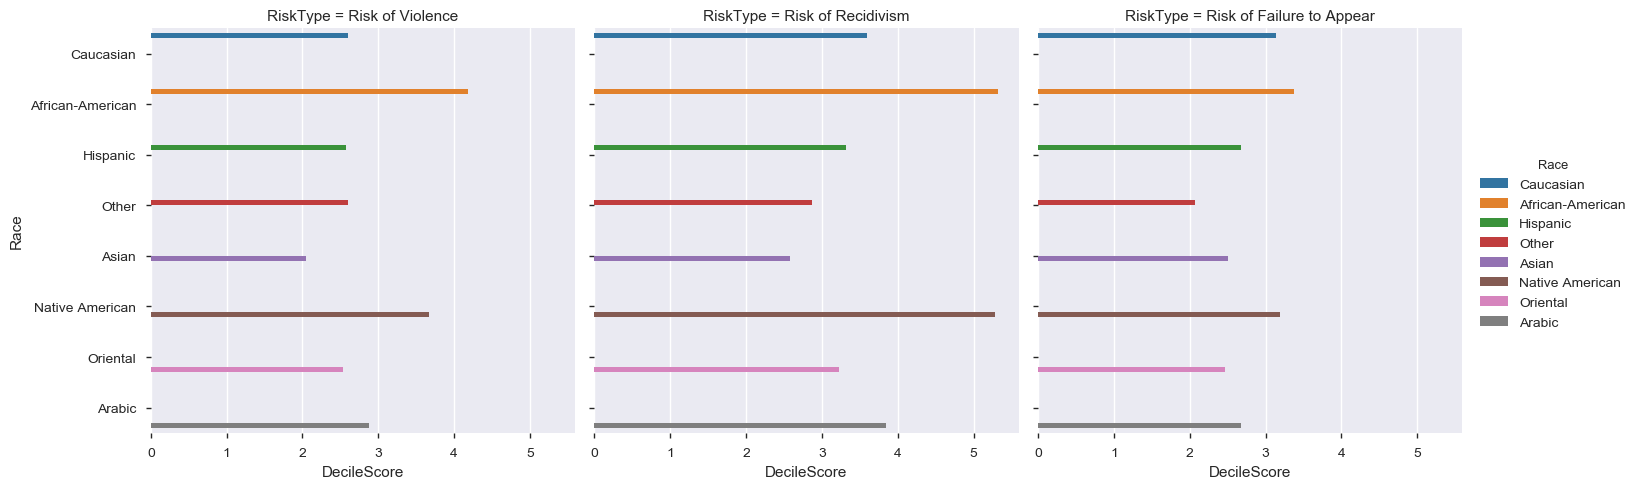

In [55]:
ax = sns.catplot(x='DecileScore',y='Race', col='RiskType', hue='Race', data=df, kind='bar', ci=False, orient='h')

In [57]:
#race vs risk of recidivism
df[df.RiskType == 'Risk of Recidivism'].groupby('Race')["Person_ID"].count().sort_values(ascending=False)

Race
African-American    9023
Caucasian           7261
Hispanic            2914
Other                864
Asian                108
Native American       73
Arabic                25
Oriental              13
Name: Person_ID, dtype: int64

In [58]:
#race vs recommended supervision level
df.groupby('Race')['RecSupervisionLevel'].mean()

Race
African-American    1.943145
Arabic              1.480000
Asian               1.194444
Caucasian           1.406418
Hispanic            1.334935
Native American     1.863014
Oriental            1.230769
Other               1.280093
Name: RecSupervisionLevel, dtype: float64

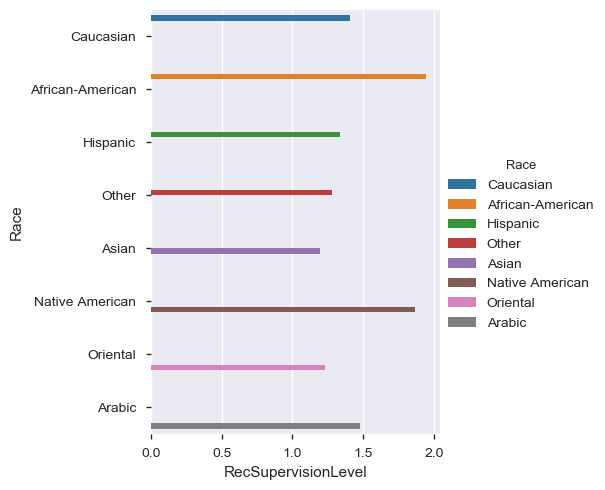

In [59]:
ax = sns.catplot(x='RecSupervisionLevel',y='Race',hue='Race', data=df, kind='bar', ci=False, orient='h')

In [60]:
#race vs rawscore
df.groupby('Race')['RawScore'].mean()

Race
African-American    5.501559
Arabic              4.697467
Asian               4.123611
Caucasian           4.908800
Hispanic            4.574836
Native American     5.389954
Oriental            4.452564
Other               3.968125
Name: RawScore, dtype: float64

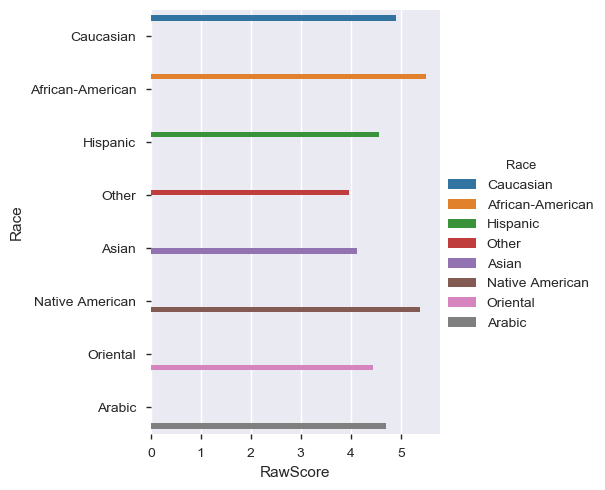

In [61]:
ax = sns.catplot(x='RawScore',y='Race',hue='Race', data=df, kind='bar', ci=False, orient='h')

In [62]:
#male vs female
df.groupby('Sex')['Person_ID'].count()

Sex
Female    13329
Male      47514
Name: Person_ID, dtype: int64

### Positive Correlation between RawScore and Scale_ID

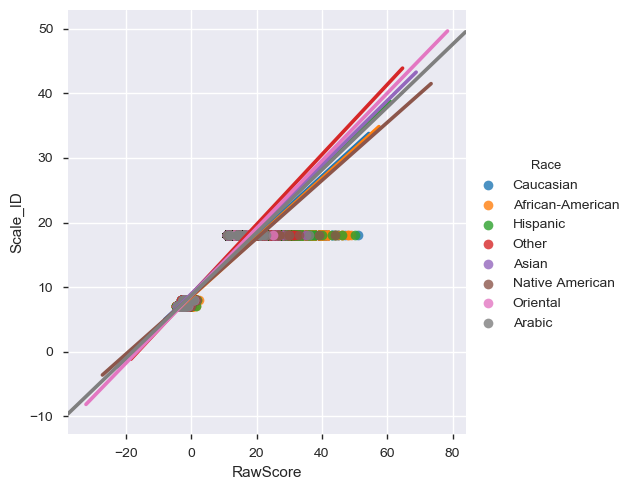

In [63]:
sns.lmplot(x='RawScore',y='Scale_ID',data=df, hue="Race", ci=False)